In [1]:
#load modules
from Bio import Entrez, Seq, SeqIO, pairwise2, Align
import numpy as np

#load nucleotide sequences from NCBI 
def get_seq(db, key, rettype="gb"):
    Entrez.email = "A.N.Other@example.com"
    handle = Entrez.efetch(db=db, id=key, rettype=rettype)
    return SeqIO.read(handle, "gb")

## Call NCBI API

In [2]:
#[welche daten werden geladen?]
#hvr-1
nea_1a = get_seq("nucleotide", "AF011222")
nea_1b = get_seq("nucleotide", "AF282971")

#[welche daten werden geladen?]
#hvr-2
nea_2a = get_seq("nucleotide", "AF142095")
nea_2b = get_seq("nucleotide", "AF282972")

In [3]:
n = 206 #known length

nea_1 = nea_1a.seq + nea_2a.seq
nea_2 = nea_1b.seq + nea_2b.seq

# Trim sequences with local alignment

In [115]:
nea_1_algn = []
sequences = []
tmp_sequences = []
scores = []
starts = []
ends = []
span = []
human_ids = []
with open("d_loop.fasta", "r") as handle:
    d_loop = list(SeqIO.parse(handle, "fasta"))
    for a in d_loop:
        sequences.append(a)
        human_ids.append(a.id)
    for i in range(206):
        alignment = pairwise2.align.localms(sequences[i].seq, nea_1, 5, -4, -8, -8)
        tmp_sequence = alignment[i][0]
        starts.append(alignment[i][3])
        ends.append(alignment[i][4])
        span.append(alignment[i][4]-alignment[i][3])
        tmp_sequences.append(tmp_sequence)
        scores.append(alignment[i][2])
        nea_1_algn.append(alignment[i][1])
"""    for j in range(203,206):
        alignment = pairwise2.align.localms(sequences[j].seq, nea_1, 5, -4, -8, -8)
        tmp_sequence = alignment[j][0]
        starts.append(alignment[j][3])
        ends.append(alignment[j][4])
        span.append(alignment[j][4]-alignment[i][3])
        tmp_sequences.append(tmp_sequence)
        scores.append(alignment[j][2])"""

IndexError: list index out of range

In [116]:
sequences = []
with open("d_loop.fasta", "r") as handle:
    d_loop = list(SeqIO.parse(handle, "fasta"))
    for a in d_loop:
        sequences.append(a)
    for j in range(203,206):
        alignment = pairwise2.align.localms(sequences[j].seq, nea_1, 5, -4, -8, -8)
        tmp_sequence = alignment[j][0]
        starts.append(alignment[j][3])
        ends.append(alignment[j][4])
        span.append(alignment[j][4]-alignment[i][3])
        tmp_sequences.append(tmp_sequence)
        scores.append(alignment[j][2])

IndexError: list index out of range

In [28]:
trimmed_sequences = []
smallest_val = min(span)
var = span.index(smallest_val)
start = starts[var]
end = ends[var]

for l in range(len(tmp_sequences)):
    whole_sequence = tmp_sequences[l]
    trimmed_sequence = whole_sequence[start:end]
    trimmed_sequences.append(trimmed_sequence)
    

In [53]:
def trimmer(seq):
    start = 0
    var = False
    while var == False:
        if seq[start] != "-":
            var = True
        else:
            start += 1
    var = False
    end = len(seq) -1
    return seq[start:start+min(span)]
    

nea_1_trimmed = trimmer(nea_1_algn[var])
trimmed_sequences.append(nea_1_trimmed)
nea_alignment = pairwise2.align.localms(nea_1_trimmed, nea_2, 5, -4, -8, -8)
nea_2_untrimmed = nea_alignment[0][1]
nea_2_trimmed = nea_2_untrimmed[0:min(span)]
trimmed_sequences.append(nea_2_trimmed)



In [117]:
record_trimmed_list = []
for k in range(len(trimmed_sequences)-2):
    x_1 = str(k+1)
    x_2 = "human_"
    x = str(x_2 + x_1)
    record_trimmed_list.append(SeqRecord(Seq(trimmed_sequences[k], generic_dna), id= x))
for j in range(len(trimmed_sequences)-2, len(trimmed_sequences)):
    x_1 = str(j-len(trimmed_sequences)+3)
    x_2 = "nea_"
    x = str(x_2 + x_1)
    record_trimmed_list.append(SeqRecord(Seq(trimmed_sequences[k], generic_dna), id= x))
with open("alignment_w_nea.fasta", "w") as output_handle:
    SeqIO.write(record_trimmed_list, output_handle, "fasta")


In [119]:
human_ids = human_ids[0:202]
human_ids.append("nea_1")
human_ids.append("nea_2")

In [120]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
record_trimmed_list = []
for k in range(len(trimmed_sequences)):
    record_trimmed_list.append(SeqRecord(Seq(trimmed_sequences[k], generic_dna), id=human_ids[k]))
align = MultipleSeqAlignment(record_trimmed_list)
calculator = DistanceCalculator('identity')
d = calculator.get_distance(align)

Andalusia(AF382011).txt	0
Aust(AF346963).txt	0.3031161473087819	0
Aust(AF346964).txt	0.5892351274787535	0.6997167138810199	0
Aust(AF346965).txt	0.5977337110481586	0.4447592067988668	0.6685552407932012	0
Aust(AY289051).txt	0.014164305949008527	0.29461756373937675	0.594900849858357	0.603399433427762	0
Aust(AY289052).txt	0.6487252124645893	0.6118980169971671	0.5722379603399433	0.6345609065155807	0.6458923512747876	0
Aust(AY289053).txt	0.5977337110481586	0.43909348441926344	0.6770538243626063	0.07932011331444755	0.6005665722379603	0.6203966005665722	0
Aust(AY289054).txt	0.4929178470254958	0.49008498583569404	0.708215297450425	0.6572237960339944	0.48441926345609065	0.6203966005665722	0.660056657223796	0
Aust(AY289055).txt	0.6430594900849859	0.594900849858357	0.5864022662889519	0.6628895184135977	0.6430594900849859	0.623229461756374	0.6515580736543909	0.660056657223796	0
Aust(AY289056).txt	0.5637393767705383	0.5892351274787535	0.6288951841359773	0.6827195467422096	0.5524079320113314	0.637393

In [122]:
from Bio import Phylo
Phylo.draw_ascii(tree)


                   , 203
  _________________|
 |                 | 202
 |
 |                   ______ 192
 |              ____|
 |             |    |______ 144
 |   __________|
 |  |          |     ______ 194
 |  |          |____|
 |  |               |______ 51
 |  |
 |  |                _________ 187
 |  |          _____|
 |  |         |     |_________ 137
 |  |         |
_|  |    _____|               , 191
 |  |   |     |              ,|
 |  |   |     |              |, 93
 |  |   |     |              ||
 |  |   |     |______________|| 88
 |  |   |                    |
 |  |   |                    |, 164
 |  |   |                    ||
 |  |   |                     | 52
 |  |   |
 |  |   |                  , 165
 |  |   |                  |
 |  |   |     _____________| 148
 |  |   |    |             |
 |  |   |  __|             | 145
 |  |   | |  |
 |__|   | |  |_____________ 48
    |   | |
    |   | |       ____________ 188
    |   | |      |
    |   | |      |                ___ 107

In [124]:
help(Phylo.draw_ascii)

Help on function draw_ascii in module Bio.Phylo._utils:

draw_ascii(tree, file=None, column_width=80)
    Draw an ascii-art phylogram of the given tree.
    
    The printed result looks like::
    
                                        _________ Orange
                         ______________|
                        |              |______________ Tangerine
          ______________|
         |              |          _________________________ Grapefruit
        _|              |_________|
         |                        |______________ Pummelo
         |
         |__________________________________ Apple
    
    
    :Parameters:
        file : file-like object
            File handle opened for writing the output drawing. (Default:
            standard output)
        column_width : int
            Total number of text columns used by the drawing.



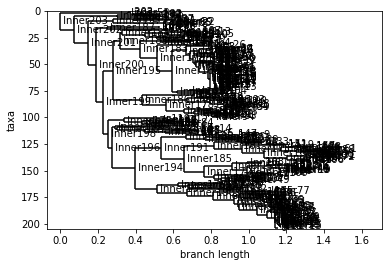

In [127]:
Phylo.draw(tree)